In [44]:
import pandas as pd 
import numpy as np
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve, accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

In [48]:
def plot_confusion_matrices(cm, cm_normalized, classifier_name, y_test_labels):
    """
    Graficar las matrices de confusión (normal y normalizada).
    
    Args:
        cm (array-like): Matriz de confusión normal.
        cm_normalized (array-like): Matriz de confusión normalizada.
        classifier_name (str): Nombre del clasificador.
        y_test_labels (array-like): Etiquetas únicas de la clase real.
    """
    fig, axes = plt.subplots(1, 2, figsize=(7, 4))

    # Matriz de confusión normal
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_test_labels)
    disp.plot(ax=axes[0], cmap=plt.cm.Blues, colorbar=False)
    axes[0].set_title(f"Normal ({classifier_name})")
    axes[0].set_xlabel("Predicción")
    axes[0].set_ylabel("Clase Real")

    # Matriz de confusión normalizada
    disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=y_test_labels)
    disp_norm.plot(ax=axes[1], cmap=plt.cm.Oranges, colorbar=False)
    axes[1].set_title(f"Normalizada ({classifier_name})")
    axes[1].set_xlabel("Predicción")
    axes[1].set_ylabel("Clase Real")

    # Ajustar diseño y mostrar
    plt.tight_layout()
    plt.show()

def plot_feature_importances(feature_importances, feature_names, title="Importancia de características en AdaBoost"):
    """
    Grafica las importancias de características en un modelo basado en árboles.

    Args:
        feature_importances (array-like): Importancias de las características.
        feature_names (array-like): Nombres de las características.
        title (str): Título del gráfico. Por defecto: "Importancia de características en AdaBoost".
    """
    # Ordenar por importancia
    sorted_indices = np.argsort(feature_importances)[::-1]
    sorted_importances = feature_importances[sorted_indices]
    sorted_features = feature_names[sorted_indices]

    # Crear el gráfico
    plt.figure(figsize=(10, 8))
    plt.barh(sorted_features, sorted_importances, color="skyblue")
    plt.xlabel("Importancia de la característica")
    plt.ylabel("Características")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

feature_importances = np.array([0.005, 0.0, 0.0, 0.005, 0.015, 0.0, 0.035, 0.0, 0.0,
                                 0.015, 0.0, 0.015, 0.01, 0.0, 0.095, 0.015, 0.115, 0.025,
                                 0.05, 0.05, 0.0, 0.0, 0.035, 0.0, 0.0, 0.025, 0.01,
                                 0.135, 0.005, 0.0, 0.0, 0.155, 0.0, 0.045, 0.04, 0.015,
                                 0.0, 0.0, 0.0, 0.0, 0.0, 0.085])

feature_names = np.array(['CODE_GENDER_1', 'CODE_GENDER_2', 'FLAG_OWN_CAR_1',
                          'FLAG_OWN_CAR_2', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                          'NAME_INCOME_TYPE_6', 'NAME_INCOME_TYPE_7',
                          'NAME_EDUCATION_TYPE_1', 'NAME_EDUCATION_TYPE_2', 'DAYS_EMPLOYED',
                          'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'OCCUPATION_TYPE',
                          'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
                          'EXT_SOURCE_2', 'EXT_SOURCE_3', 'BASEMENTAREA_AVG',
                          'YEARS_BUILD_AVG', 'NONLIVINGAREA_AVG', 'YEARS_BUILD_MODE',
                          'ELEVATORS_MODE', 'FLOORSMAX_MODE', 'NONLIVINGAPARTMENTS_MODE',
                          'NONLIVINGAREA_MODE', 'COMMONAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
                          'NONLIVINGAPARTMENTS_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                          'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
                          'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_10',
                          'FLAG_DOCUMENT_18', 'AMT_REQ_CREDIT_BUREAU_QRT'])


def plot_precision_recall_curve(y_test, y_pred_proba, model_name="Modelo"):
    """
    Calcula y grafica la curva Precision-Recall para un modelo clasificador.

    Args:
        y_test (array-like): Etiquetas reales del conjunto de prueba.
        y_pred_proba (array-like): Probabilidades predichas para la clase positiva.
        model_name (str): Nombre del modelo para incluir en el título del gráfico.
    """
    # Calcular la curva Precision-Recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

    # Calcular el área bajo la curva (AUC-PR)
    pr_auc = auc(recall, precision)
    print(f"AUC-PR: {pr_auc:.3f}")

    # Encontrar el mejor punto en la curva Precision-Recall (mayor F1-score)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
    best_index = np.argmax(f1_scores)
    print(f"Mejor umbral: {thresholds[best_index]:.3f}, Precision: {precision[best_index]:.3f}, Recall: {recall[best_index]:.3f}")

    # Graficar la curva Precision-Recall
    plt.figure(figsize=(7, 4))
    plt.plot(recall, precision, marker='.', label=f'{model_name} (AUC = {pr_auc:.3f})')  # Curva Precision-Recall
    plt.scatter(recall[best_index], precision[best_index], s=100, marker='o', color='black', label='Best')  # Mejor punto

    # Etiquetas de los ejes
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.grid()
    plt.show()

def plot_roc_curve(y_test, y_pred_proba, model_name="Modelo"):
    """
    Calcula y grafica la curva ROC para un modelo clasificador.

    Args:
        y_test (array-like): Etiquetas reales del conjunto de prueba.
        y_pred_proba (array-like): Probabilidades predichas para la clase positiva.
        model_name (str): Nombre del modelo para incluir en el título del gráfico.
    """
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Calcular el AUC-ROC
    auc_value = roc_auc_score(y_test, y_pred_proba)
    
    # Encontrar el mejor punto en la curva ROC (punto más cercano a la esquina superior izquierda)
    gmeans = np.sqrt(tpr * (1 - fpr))
    ix = np.argmax(gmeans)
    print(f"Mejor umbral: {thresholds[ix]:.3f}, TPR: {tpr[ix]:.3f}, FPR: {fpr[ix]:.3f}")

    # Graficar la curva ROC
    plt.figure(figsize=(5, 4))
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label=f'{model_name} (AUC = {auc_value:.3f})')
    plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best') 

    # Etiquetas de los ejes
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid()
    plt.show()



def plot_lift_curve_by_class(y_test, y_pred_proba, model_name="Modelo"):
    """
    Calcula y grafica la curva LIFT separada por clases para un modelo clasificador.

    Args:
        y_test (array-like): Etiquetas reales del conjunto de prueba.
        y_pred_proba (array-like): Probabilidades predichas para la clase positiva.
        model_name (str): Nombre del modelo para incluir en el título del gráfico.
    """
    import seaborn as sns

    # Crear un DataFrame con etiquetas reales y probabilidades predichas
    data = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_proba})
    data = data.sort_values(by='y_pred_proba', ascending=False)

    # Calcular lift por clase
    results = []
    total_positives = (data['y_test'] == 1).sum()
    total_negatives = (data['y_test'] == 0).sum()
    cumulative_positives = data['y_test'].cumsum()
    cumulative_negatives = (~data['y_test'].astype(bool)).cumsum()

    lift_positive = cumulative_positives / total_positives
    lift_negative = cumulative_negatives / total_negatives

    # Construir DataFrame para graficar
    lift_df = pd.DataFrame({
        'Porcentaje de la muestra': np.arange(1, len(data) + 1) / len(data),
        'Clase 1 (Lift)': lift_positive,
        'Clase 0 (Lift)': lift_negative,
    })

    # Graficar
    plt.figure(figsize=(7, 4))
    sns.lineplot(x='Porcentaje de la muestra', y='Clase 1 (Lift)', data=lift_df, label='Clase 1', color='orange')
    sns.lineplot(x='Porcentaje de la muestra', y='Clase 0 (Lift)', data=lift_df, label='Clase 0', color='blue')
    plt.axhline(y=1, color='black', linestyle='--', label='Línea base')
    plt.xlabel('Porcentaje de la muestra')
    plt.ylabel('Lift')
    plt.title(f'Curva Lift - {model_name}')
    plt.legend()
    plt.grid()
    plt.show()

def plot_cumulative_gains_by_class(y_test, y_pred_proba, model_name="Modelo"):
    """
    Calcula y grafica la curva de ganancias acumuladas (Cumulative Gains) separada por clases para un modelo clasificador.

    Args:
        y_test (array-like): Etiquetas reales del conjunto de prueba.
        y_pred_proba (array-like): Probabilidades predichas para la clase positiva.
        model_name (str): Nombre del modelo para incluir en el título del gráfico.
    """
    import seaborn as sns

    # Crear un DataFrame con etiquetas reales y probabilidades predichas
    data = pd.DataFrame({'y_test': y_test, 'y_pred_proba': y_pred_proba})
    data = data.sort_values(by='y_pred_proba', ascending=False)

    # Calcular ganancias acumuladas por clase
    cumulative_positives = data['y_test'].cumsum()
    cumulative_negatives = (~data['y_test'].astype(bool)).cumsum()
    total_positives = (data['y_test'] == 1).sum()
    total_negatives = (data['y_test'] == 0).sum()

    gains_positive = cumulative_positives / total_positives
    gains_negative = cumulative_negatives / total_negatives

    # Construir DataFrame para graficar
    gains_df = pd.DataFrame({
        'Porcentaje de la muestra': np.arange(1, len(data) + 1) / len(data),
        'Clase 1 (Gain)': gains_positive,
        'Clase 0 (Gain)': gains_negative,
    })

    # Graficar
    plt.figure(figsize=(7, 4))
    sns.lineplot(x='Porcentaje de la muestra', y='Clase 1 (Gain)', data=gains_df, label='Clase 1', color='orange')
    sns.lineplot(x='Porcentaje de la muestra', y='Clase 0 (Gain)', data=gains_df, label='Clase 0', color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Línea base')
    plt.xlabel('Porcentaje de la muestra')
    plt.ylabel('Ganancia acumulada')
    plt.title(f'Curva de Ganancias Acumuladas - {model_name}')
    plt.legend()
    plt.grid()
    plt.show()


In [3]:
pd_loan_train = pd.read_csv("../data/train_pd_data_preprocessing_missing_outlier.csv")

pd_loan_test = pd.read_csv("../data/test_pd_data_preprocessing_missing_outlier.csv")

In [4]:
pd_loan_train.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'TARGET'],
      dtype='object', length=122)

In [5]:
pd_loan_train.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
TARGET                          int64
Length: 122, dtype: object

CODIFICACIÓN DE LA VARIABLE OBJETIVO

Como las categorías de TARGET ya están en 0 y 1 no hacemos la codificación de la varibale objetivo, pues ya están codificadas previamente.

CODIFICACIÓN DEL RESTO DE VARIABLES

Codificación del resto de variables: usaremos One-hot Enconding, que es una técnica utilizada para transformar variables categóricas en variables numéricas binarias, creando nuevas columnas (features) para cada categoría única. Cada fila tendrá un 1 en la columna correspondiente a su categoría y 0 en el resto

In [6]:
X_train = pd_loan_train.drop('TARGET',axis=1)
X_test = pd_loan_test.drop('TARGET',axis=1)
y_train = pd_loan_train['TARGET']
y_test = pd_loan_test['TARGET']

X_train y X_test se obtienen eliminando la columna TARGET (que es la variable objetivo) de los conjuntos de entrenamientos pd_loan_train y pd_loan_test.Estas variables solo contienen las características que el modelo utilizará para hacer las predicciones, sin TARGET, pues si no, el modelo tendría acceso directo a lo que se quiere predecir. Por otra parte, y_train e y_test son las variables objetivo de los conjuntos de entrenamiento y prueba que se usn para entrenar el modelo.

Aquí, dentro de las variables categóricas, se establecen cuantos valores diferentes tiene cada variable para ver si es viable el 'OneHotEnconding' o si hay algunas a las que aplicar otro tipo de codificador.

In [7]:
categorical_counts = pd_loan_train.select_dtypes(include='object').nunique()
categorical_counts_sorted = categorical_counts.sort_values(ascending=False)
print(categorical_counts_sorted)

ORGANIZATION_TYPE             58
OCCUPATION_TYPE               19
NAME_TYPE_SUITE                8
NAME_INCOME_TYPE               8
WALLSMATERIAL_MODE             8
WEEKDAY_APPR_PROCESS_START     7
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_EDUCATION_TYPE            5
FONDKAPREMONT_MODE             5
HOUSETYPE_MODE                 4
CODE_GENDER                    3
EMERGENCYSTATE_MODE            3
NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
dtype: int64


Una vez establecidos los diferentes valores, se aplicará el OneHotEncoding para todas las variables, y para ORGANIZATION_TYPE y OCUPATION_TYPE se aplicará TargetEncoding

Definimos la columna objetivo, en este caso TARGET

In [8]:
y_train = pd_loan_train['TARGET'] 
y_test = pd_loan_test['TARGET']

Eliminamos la columna objetivo de X_train y X_test

In [9]:
X_train = pd_loan_train.drop(columns=['TARGET'])
X_test = pd_loan_test.drop(columns=['TARGET'])

Lista de variables categóricas, eliminando 'ORGANIZATYON_TYPE' y 'OCCUPATION_TYPE'

In [10]:
list_columns_cat = list(X_train.select_dtypes(include=["object", "category"]).columns)
list_columns_cat = [col for col in list_columns_cat if col not in ['ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'WALLSMATERIAL_MODE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE']]

Aqui se seleccionan solo las columnas que son de tipo 'object' y 'category', que tienen que ser codificadas anter de ser utilizadas en el modelo. En cuanto a list_other, obtiene las demas columnas que no son catgóricas.

In [11]:
ohe = ce.OneHotEncoder(cols = list_columns_cat)

Creamos el codificador TargetEncoder para 'ORGANIZATION_TYPE' y 'OCCUPATION_TYPE'

In [12]:
te = ce.TargetEncoder(cols=['ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'WALLSMATERIAL_MODE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE'])

Creamos un Pipeline para que aplique ambos codificadores en secuencia

In [13]:
model = Pipeline(steps=[
    ('ohe', ohe),
    ('te', te)     
])

Aplicamos la codificación a train y luego aplicamos la codificación realizada en train a test

In [14]:
X_train_t = model.fit_transform(X_train, y_train)  
X_test_t = model.transform(X_test)

Verificamos que se han creado las columnas a través de la codificación

In [15]:
print(len(X_train_t.columns))
print(len(X_test_t.columns))

134
134


ESCALADO DE VARIABLES

In [16]:
scaler = StandardScaler()
model_scaled = scaler.fit(X_train_t)
X_train_scaled = pd.DataFrame(scaler.transform(X_train_t), columns=X_train_t.columns, index=X_train_t.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_t), columns=X_test_t.columns, index=X_test.index)
X_train_scaled.describe()

,SK_ID_CURR,NAME_CONTRACT_TYPE_1,NAME_CONTRACT_TYPE_2,CODE_GENDER_1,CODE_GENDER_2,CODE_GENDER_3,FLAG_OWN_CAR_1,FLAG_OWN_CAR_2,FLAG_OWN_REALTY_1,FLAG_OWN_REALTY_2,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,...,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05,2.460080e+05
mean,2.729760e-16,-1.501623e-16,3.434178e-17,8.404927e-18,-7.905253e-17,-2.364788e-19,-9.168880e-17,9.168880e-17,6.048804e-17,1.228318e-16,...,2.041300e-17,8.144981e-18,-5.603285e-18,-8.231630e-18,-3.321535e-17,-1.328614e-18,-7.403412e-17,-3.337781e-17,1.406598e-17,2.498372e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.734063e+00,-3.078384e+00,-3.248457e-01,-7.194203e-01,-1.389958e+00,-4.032356e-03,-1.394445e+00,-7.171314e-01,-6.638453e-01,-1.506375e+00,...,-9.078494e-02,-2.386234e-02,-2.181331e-02,-1.826017e-02,-7.124440e-02,-5.986941e-02,-1.570713e-01,-2.698560e-01,-2.942733e-01,-1.007296e+00
25%,-8.669758e-01,3.248457e-01,-3.248457e-01,-7.194203e-01,-1.389958e+00,-4.032356e-03,-1.394445e+00,-7.171314e-01,-6.638453e-01,-1.506375e+00,...,-9.078494e-02,-2.386234e-02,-2.181331e-02,-1.826017e-02,-7.124440e-02,-5.986941e-02,-1.570713e-01,-2.698560e-01,-2.942733e-01,-4.410254e-01
50%,1.346154e-03,3.248457e-01,-3.248457e-01,-7.194203e-01,7.194463e-01,-4.032356e-03,7.171314e-01,-7.171314e-01,-6.638453e-01,6.638453e-01,...,-9.078494e-02,-2.386234e-02,-2.181331e-02,-1.826017e-02,-7.124440e-02,-5.986941e-02,-1.570713e-01,-2.698560e-01,-2.942733e-01,-4.410254e-01
75%,8.663134e-01,3.248457e-01,-3.248457e-01,1.390008e+00,7.194463e-01,-4.032356e-03,7.171314e-01,1.394445e+00,1.506375e+00,6.638453e-01,...,-9.078494e-02,-2.386234e-02,-2.181331e-02,-1.826017e-02,-7.124440e-02,-5.986941e-02,-1.570713e-01,-2.698560e-01,-2.942733e-01,6.915161e-01
max,1.729987e+00,3.248457e-01,3.078384e+00,1.390008e+00,7.194463e-01,2.479940e+02,7.171314e-01,1.394445e+00,1.506375e+00,6.638453e-01,...,1.101504e+01,4.190704e+01,4.584357e+01,5.476402e+01,5.087844e+01,8.902292e+01,4.222385e+01,3.124173e+01,3.341138e+02,1.314947e+01


En esta línea se importa StandardScaler del módulo sklearn.preprocessing. StandardScaler es una herramienta que permite estandarizar (escalar) las características de los datos haciendo que cada característica tenga una media de 0 y una desviación estándar de 1. Esta transformación es muy útil cuando las variables tienen rangos muy diferentes entre sí. Creamos una instancia para StandScaler con el nombre scaler que se utilizará para ajustar los datos de entrenamiento (fit()) y para transformar tanto los datos de entrenamiento como los de prueba (transform()). El método .fit() se utiliza para calcular la media y desviación estándar de las características en los datos de entrenamiento X_train_t. Esta información se almacenará en el objeto scaler y será utilizada para escalar tanto los datos de entrenamiento como los de prueba. Aquí aplicamos la normalización a los datos de entrenamiento de X_train_t utilizando los valores de media y desviación típica calculados con fit(). De esta manera, cada columna de X_train_t se reescalará para tener media 0 y desviación estándar de 1. Esto se hace tanto para X_train_t y para X_test_t. Posteriormente, se pasa a un Data Set de pandas para mantener la estructura original, manteniendo tanto las columnas como el índice

CONCLUSIÓN DEL ANÁLISIS EDA REALIZADO:

Respondiendo a la pregunta objetivo de si hay algún tipo de clientes más propensos al impago de un préstamos, la respuesta es sí. De acuerdo con el análisis realizado, algunos perfiles de clientes son más propensos a incumplir con el pago de un préstamo. Los factores más significativos incluyen la situación laboral, el nivel educativo y el tipo de trabajo. Por ejemplo, los desempleados y las personas en baja por maternidad tienen mayores probabilidades de incumplimiento, mientras que los trabajadores empleados y pensionistas presentan un menor riesgo debido a la estabilidad de sus ingresos.

El nivel educativo también desempeña un papel importante, ya que los clientes con niveles bajos de formación, como educación secundaria o inferior, tienen mayor probabilidad de impago, posiblemente debido a oportunidades laborales más limitadas. Por el contrario, aquellos con educación superior muestran menor riesgo.

El tipo de ocupación refuerza esta tendencia: trabajadores manuales o de baja especialización, como obreros o agricultores, son más propensos a incumplir, mientras que roles más especializados o cualificados presentan menores tasas de impago.

Adicionalmente, las puntuaciones de riesgo crediticio externas (EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3) se destacan como variables predictivas clave. Clientes con valores bajos en estas puntuaciones tienen un riesgo significativamente mayor, mientras que valores altos se asocian con un historial más confiable.

Finalmente, otros factores, como el tipo de vivienda o el género, tienen una relación más moderada, pero destacan tendencias como un mayor incumplimiento entre clientes que viven con sus padres o de alquiler, y una ligera mayor propensión entre hombres frente a mujeres. En conclusión, el riesgo de impago está influido principalmente por características relacionadas con la estabilidad laboral, educativa y económica.

**1. SELECCIÓN DE VARIABLES**

REGULARIZACIÓN

La regularización es una técnica utilizada en el ámbito del aprendizaje automático y la regresión estadística para mejorar la generalización del modelo y evitar el problema de overfitting. Básicamente, la regularización introduce una penalización sobre los coeficientes del modelo durante el proceso de entrenamiento para hacer que el modelo sea menos complejo y, por lo tanto, más capaz de generalizar bien a datos nuevos. En problemas de aprendizaje supervisado, como la regresión lineal, el objetivo del modelo es minimizar la diferencia entre las predicciones y los valores reales en el conjunto de datos de entrenamiento (lo cual se logra minimizando una función de costo, como la suma de los errores al cuadrado). Sin embargo, si el modelo se ajusta demasiado a los datos de entrenamiento, puede llegar a aprender incluso el "ruido" de estos datos, lo cual lleva al problema conocido como overfitting.

El overfitting ocurre cuando el modelo aprende las particularidades y ruidos del conjunto de entrenamiento, lo cual resulta en un mal rendimiento sobre datos que no ha visto antes (es decir, los datos de prueba). En este contexto, la regularización se aplica para reducir la varianza del modelo y hacer que sea menos susceptible a datos ruidosos, resultando en un mejor poder de generalización.

**Regresiones con regularización**

**1.1 Regularización Ridge**

Esta regularización introduce una penalización sobre la suma de cuadrados de los coeficientes, de manera que hace que se reduzcan en vez de eliminarlos por completo. Esto es útil cuando hay una gran cantidad de variables correlacionadas entre sí, ya que esta regularización tiende a mantener todas las variables, aunque con unos pesos más bajos.

In [17]:
sel_ridge = SelectFromModel(LogisticRegression(C=0.1, penalty='l2'), threshold = 'mean')
sel_ridge.fit(X_train_scaled, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.1), threshold='mean')

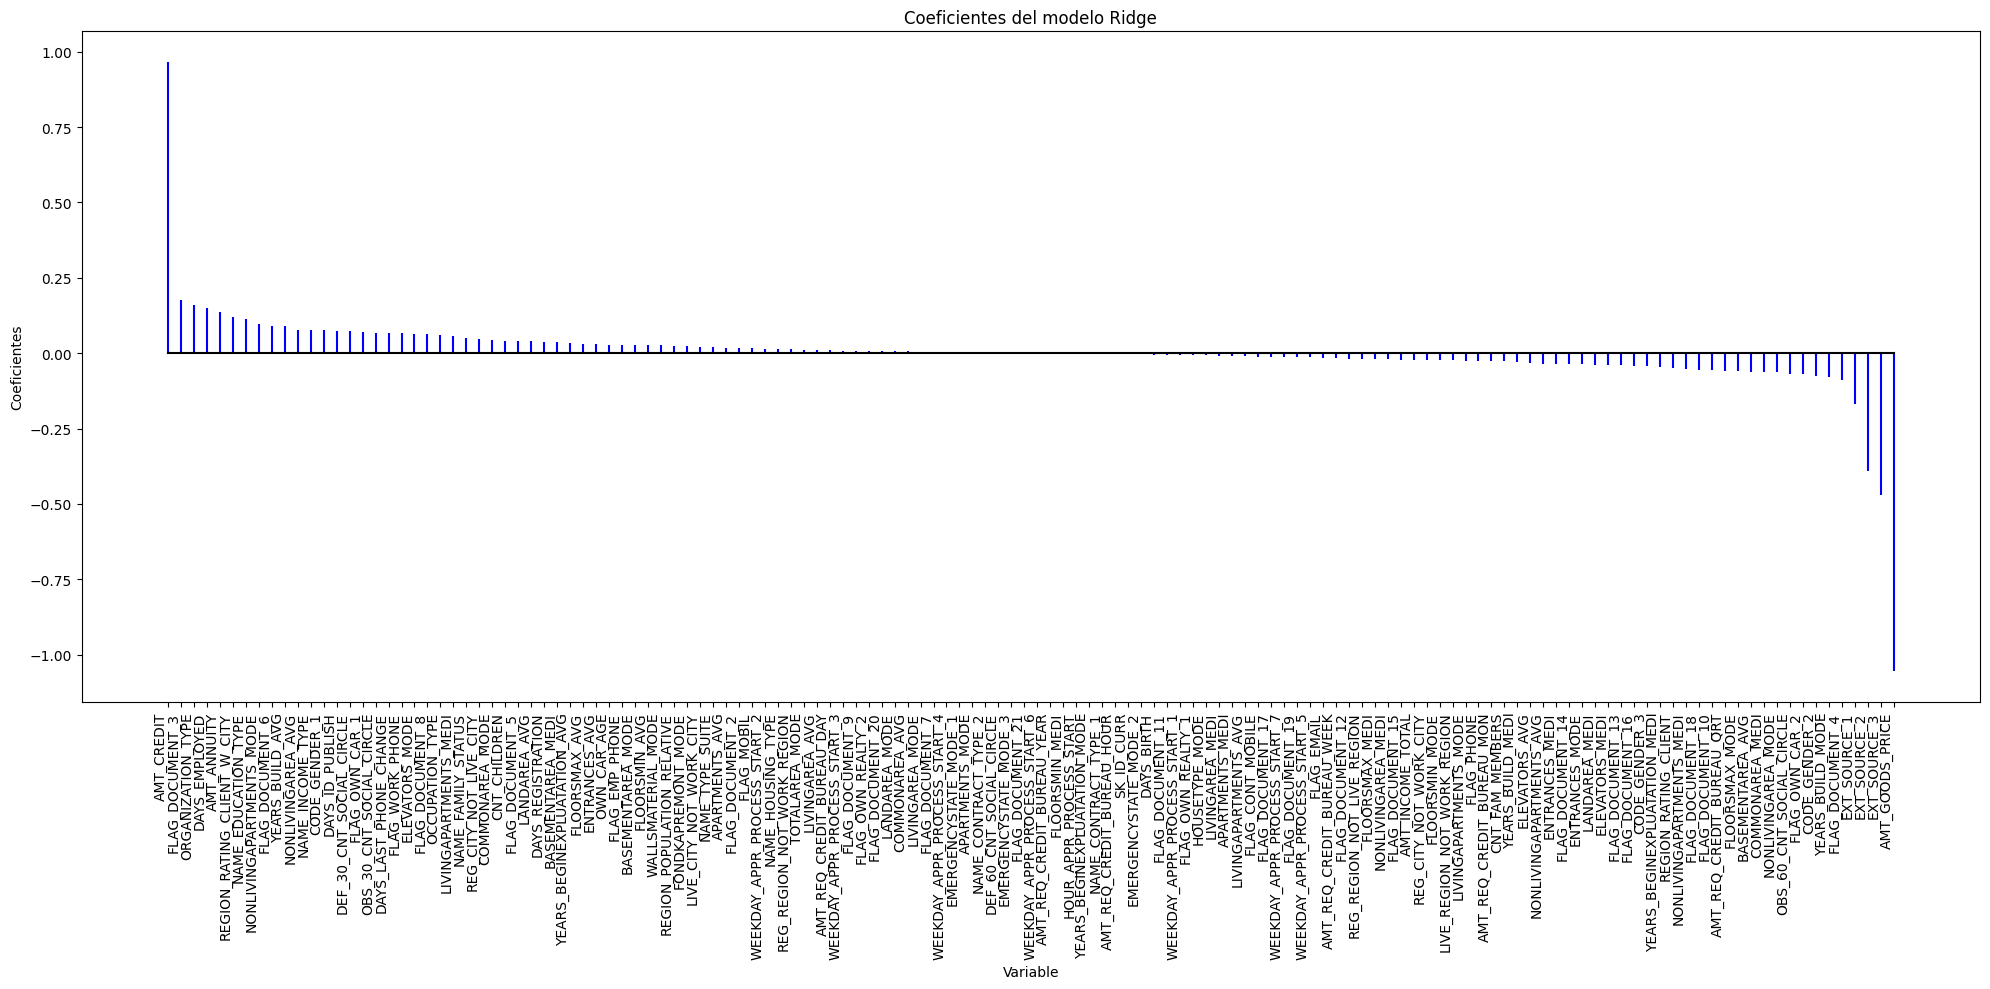

In [18]:
df_coeficientes = pd.DataFrame({
    'predictor': X_train_scaled.columns,
    'coef': sel_ridge.estimator_.coef_.flatten()
})

# Ordenar los coeficientes por magnitud
df_coeficientes = df_coeficientes.sort_values(by='coef', ascending=False)

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ', linefmt='b-', basefmt="k")
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('Variable')
ax.set_ylabel('Coeficientes')
ax.set_title('Coeficientes del modelo Ridge')
plt.tight_layout()  # Evita que las etiquetas se solapen
plt.show()

In [19]:
sel_ridge.get_support()
selected_feat = X_train_scaled.columns[sel_ridge.get_support()]
selected_feat

Index(['CODE_GENDER_1', 'CODE_GENDER_2', 'FLAG_OWN_CAR_1', 'FLAG_OWN_CAR_2',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'FLAG_WORK_PHONE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'NONLIVINGAREA_AVG',
       'YEARS_BUILD_MODE', 'ELEVATORS_MODE', 'FLOORSMAX_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MEDI',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8',
       'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype='object')

In [20]:
print('total features: {}'.format((X_train_scaled.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 134
selected features: 36


**PRUEBA DE LAS VARIABLES SELECCIONADAS CON DIFERENTES MODELOS**

Tras haber seleccionado las variables con el método Ridge, vamos a probar diferentes modelos como Random Forest, GradientBoostingClassifier, Xgboost y Lightgbm. Primero, definimos el conjunto de entrenamiento y prueba con las características seleccionadas por ridge.

In [21]:
X_train_t = X_train_scaled[selected_feat]
X_test_t = X_test_scaled[selected_feat]

Al estar probando nuestros modelos, nos hemos topado con un problema: todos los modelos nos daban el mismo resultado. Como estuvimos viendo en clase, una manera que podría ayudarnos a solucionar esto, era usar SMOTE para crear datos sintéticos de la clase minoritaria. 

In [54]:
seed=123
smote = SMOTE(random_state=seed)
# Aplicar el pipeline al conjunto de datos
X_train_smote, y_train_smote = smote.fit_resample(X_train_t, y_train)

In [23]:
classifiers = [
    RandomForestClassifier(class_weight='balanced'),
    GradientBoostingClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    LGBMClassifier(),
    AdaBoostClassifier()
    
]

results = []

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train_resampled, y_train_resampled)
    score = pipe.score(X_test_t, y_test)
    y_pred = pipe.predict(X_test_t)
    print(f"Modelo: {classifier.__class__.__name__}")
    print(f"Accuracy: {score:.3f}")
    print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
    

    results.append({'Modelo': classifier.__class__.__name__, 'Accuracy': score})

Modelo: RandomForestClassifier
Accuracy: 0.905
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56538
           1       0.25      0.09      0.14      4965

    accuracy                           0.90     61503
   macro avg       0.59      0.53      0.54     61503
weighted avg       0.87      0.90      0.88     61503

Modelo: GradientBoostingClassifier
Accuracy: 0.852
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92     56538
           1       0.20      0.27      0.23      4965

    accuracy                           0.85     61503
   macro avg       0.56      0.59      0.57     61503
weighted avg       0.87      0.85      0.86     61503



c:\Users\Sara\anaconda3\1\envs\P2_ML\lib\site-packages\xgboost\core.py:158: UserWarning: [00:30:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Modelo: XGBClassifier
Accuracy: 0.908
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56538
           1       0.27      0.09      0.13      4965

    accuracy                           0.91     61503
   macro avg       0.60      0.53      0.54     61503
weighted avg       0.87      0.91      0.89     61503

[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8486
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Modelo: LGBMClassifier
Accuracy: 0.909
Reporte de clasificación:
               precision    recall  f

c:\Users\Sara\anaconda3\1\envs\P2_ML\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Modelo: AdaBoostClassifier
Accuracy: 0.780
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87     56538
           1       0.16      0.40      0.23      4965

    accuracy                           0.78     61503
   macro avg       0.55      0.61      0.55     61503
weighted avg       0.88      0.78      0.82     61503



Hemos evaluado varios modelos de clasificación, Random Forest Classifier, Gradient Boosting Classifier, XGBoost, LGBM y AdaBoost Classifier utilizando el conjunto de train.

Random forest: el modelo clasifica bien el 92% de las instancias del train set. Para la clase 0 (mayoritaria), el 92% de las instancias que son "0" están bien clasificadas, e identifica el 98% de instancias de clase 0. Para la clase 1, sólo el 25% de instancias clasificadas como "1" son correctas, y este modelo sólo identifica el 9% de las instancias reales de la clase 1. El f-score de 0.13 indica que este modelo no maneja bien esta clase. El f1-score macro promedio es de 0.54, lo que muestra unrendimiento desigual entre ambas clases. Esto implica que acierta mucho en la clase 0 pero no en la clase 1, lo que se puede deber al desequilibrio de los datos entre ellas. 

Gradient Boosting: tiene un accuracy del 85.4%. Este modelo nos da unos resultados muy parecidos a los del random forest, aunque mejora en el recall de la clase 1 al 27%. El f1-score para la clase 1 es de 0.23, ligeramente superior al Random Forest. El macro f1-score es de 0.57, que es algo mejor que en el modelo anterior pero sigue desmostrando que hay un sesgo hacia la clase mayoritaria. 

XGBoost: este modelo tiene un accuracy de 90.9%, es decir, clasifica bien el 90.9% de las instancias. Para la clase mayoritaria, tenemos una precisión de 92%, recall de 98% y f1-score de 0.95. Para la clase minoritaria, la precisión es del 28%, recall de 9%, y f1-score de 0.13, igual que el random forest. El macro f1-score sigue mostrándonos dificultades con la clase 1. 

LGBM: el accuracy global es de 90.8%. Para la clase 0 tenemos una precisión de 92%, recall de 98% y f1-score de 0.95. Para la clase 1 tenemos: precisión de 28%, recall de 9% y f1-score de 0.13. El macro f1-score sigue siendo de 0.54, mostrando aún dificultades con la clase minoritaria.

Ada Boost Clssiffier: el accuracy es del 78%, el valor más bajo hasta ahora. Para la clase 0 tiene una precisión de 94%, recall del 81%, y un f1-score de 0.87, menor al del resto de modelos por el recall más bajo. Para la clase 1, tiene una precisión del 16%, un recall de 40%, que es hasta ahora el valor más alto obtenido, y un f1-score de 0.23. El macro f1-score es de 0.55, que aunque mejora ligeramente, sigue teniendo dificultades. 

La mayoría de modelos tiene un alto porcentaje de accuracy, pero esto se debe a los datos tan desbalanceados con los que contamos. Todos tienen dificultades para detectar la clase 1, ya que la precisión, recall y f1-score para la clase 1 tienen valores bastante bajos. El AdaBoost mejora ligeramente el recall de la clase 1, pero sacrifica la precisión en la clase mayoritaria, lo que resulta en una menor accuracy general.


Matriz de confusión normal para RandomForestClassifier:
[[55136  1402]
 [ 4508   457]]
Matriz de confusión normalizada (porcentaje) para RandomForestClassifier:
[[97.52  2.48]
 [90.8   9.2 ]]%


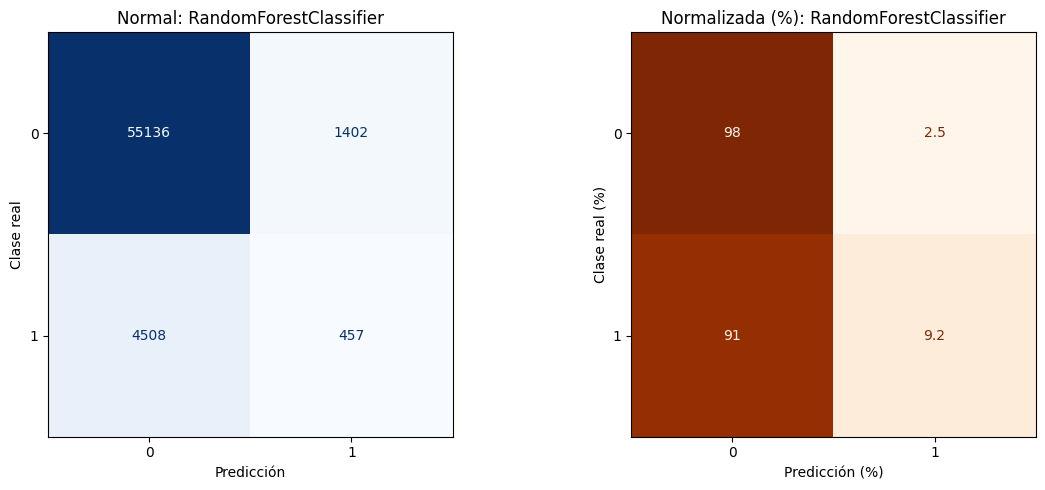


Matriz de confusión normal para GradientBoostingClassifier:
[[51086  5452]
 [ 3635  1330]]
Matriz de confusión normalizada (porcentaje) para GradientBoostingClassifier:
[[90.36  9.64]
 [73.21 26.79]]%


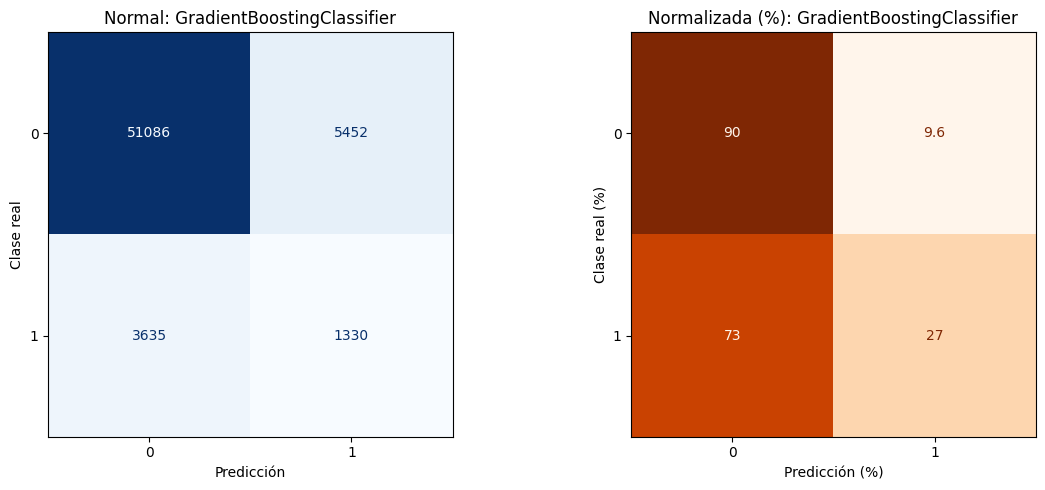

c:\Users\Sara\anaconda3\1\envs\P2_ML\lib\site-packages\xgboost\core.py:158: UserWarning: [00:40:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Matriz de confusión normal para XGBClassifier:
[[55418  1120]
 [ 4541   424]]
Matriz de confusión normalizada (porcentaje) para XGBClassifier:
[[98.02  1.98]
 [91.46  8.54]]%


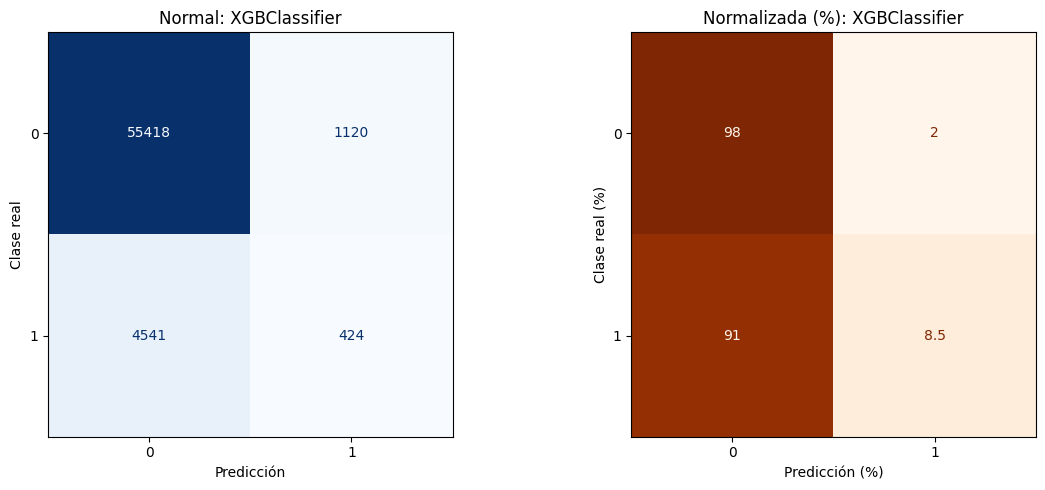

[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8486
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Matriz de confusión normal para LGBMClassifier:
[[55487  1051]
 [ 4574   391]]
Matriz de confusión normalizada (porcentaje) para LGBMClassifier:
[[98.14  1.86]
 [92.12  7.88]]%


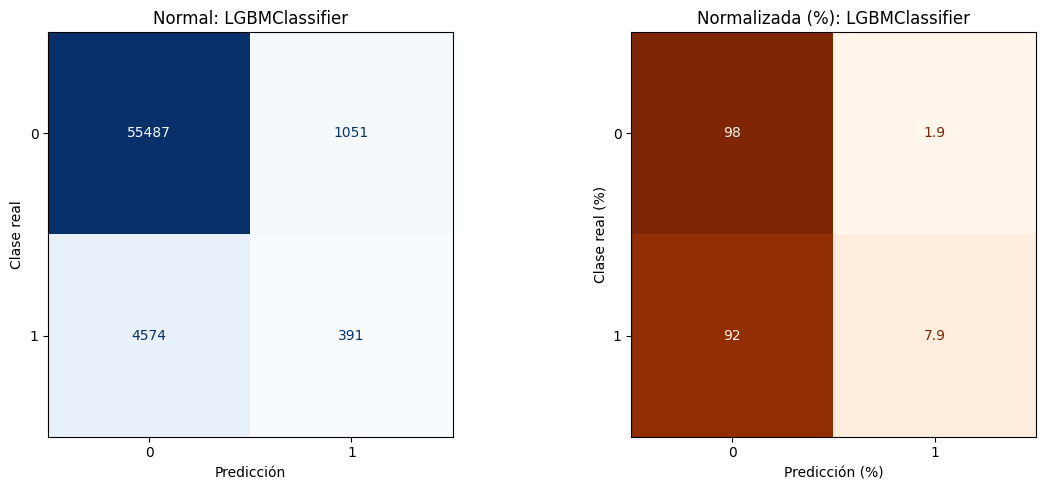

c:\Users\Sara\anaconda3\1\envs\P2_ML\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Matriz de confusión normal para AdaBoostClassifier:
[[46000 10538]
 [ 2979  1986]]
Matriz de confusión normalizada (porcentaje) para AdaBoostClassifier:
[[81.36 18.64]
 [60.   40.  ]]%


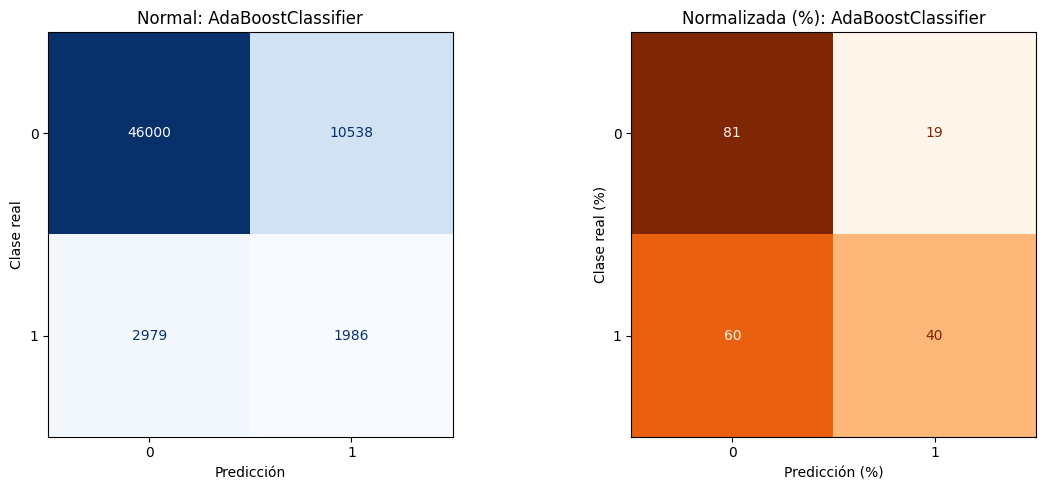

In [24]:
for classifier in classifiers:
    # Entrenar el modelo
    classifier.fit(X_train_resampled, y_train_resampled)
    
    # Predecir las etiquetas en el conjunto de prueba
    y_pred = classifier.predict(X_test_t)
    
    # Generar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Calcular la matriz de confusión normalizada (por filas, en porcentaje)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Mostrar la matriz de confusión normal
    print(f"\nMatriz de confusión normal para {classifier.__class__.__name__}:\n{cm}")
    
    # Mostrar la matriz de confusión normalizada
    print(f"Matriz de confusión normalizada (porcentaje) para {classifier.__class__.__name__}:\n{np.round(cm_percentage, 2)}%")
    
    # Visualizar las matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Matriz de confusión normal
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot(ax=axes[0], cmap=plt.cm.Blues, colorbar=False)
    axes[0].set_title(f"Normal: {classifier.__class__.__name__}")
    axes[0].set_xlabel("Predicción")
    axes[0].set_ylabel("Clase real")
    
    # Matriz de confusión normalizada
    disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=classifier.classes_)
    disp_norm.plot(ax=axes[1], cmap=plt.cm.Oranges, colorbar=False)
    axes[1].set_title(f"Normalizada (%): {classifier.__class__.__name__}")
    axes[1].set_xlabel("Predicción (%)")
    axes[1].set_ylabel("Clase real (%)")
    
    plt.tight_layout()
    plt.show()

Como comentábamos antes, la mayoría de los modelos detectan muy bien la clase 0, pero sin embargo no detectan la clase 1. 

Para nuestro punto de partida inicial, empezamos a tener en mente ajustar dos modelos: GradientBoosting y AdaBoosting. Esto lo hacemos porque el AdaBoosting es el modelo que mejor está detectando la clase 1, pero a su vez está sacrificando parte de la detección de la clase 0; pero al ser nuestro problema el de la detección de fraude, nos interesa más que nos detecte la clase 1. También pensamos en el Gradient Boosting porque tiene un equilibrio entre precisión y recall en la clase 1 de 26.59%. 

Podríamos ajustar los hiperparámetros de estos dos modelos tratando de detectar mejor la clase 1 sin sacrificar la detección de la clase 0. 

De todas formas, realizamos la curva ROC-AUC para todos los modelos en estudio.

**CURVA ROC**


Evaluando RandomForestClassifier...
Best Threshold=0.210000, G-Mean=0.644


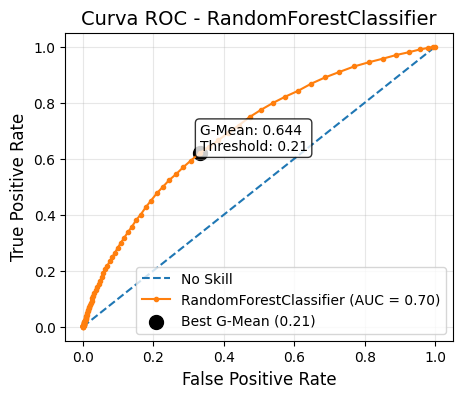


Evaluando GradientBoostingClassifier...
Best Threshold=0.295904, G-Mean=0.641


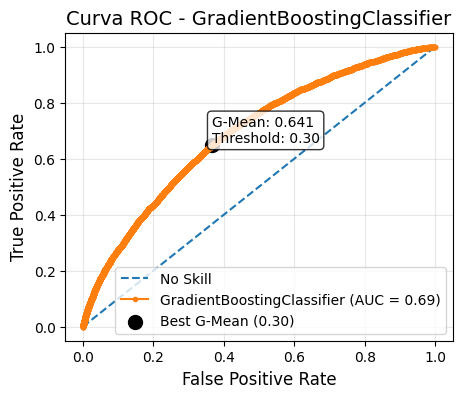


Evaluando XGBClassifier...
Best Threshold=0.116284, G-Mean=0.646


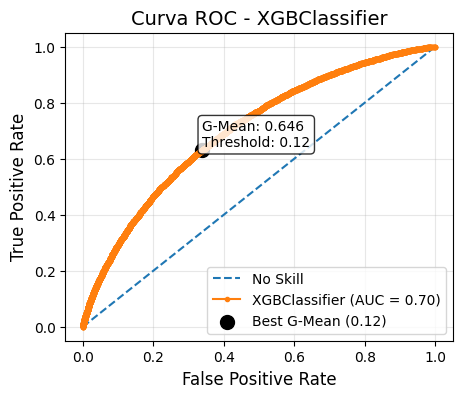


Evaluando LGBMClassifier...
Best Threshold=0.133238, G-Mean=0.644


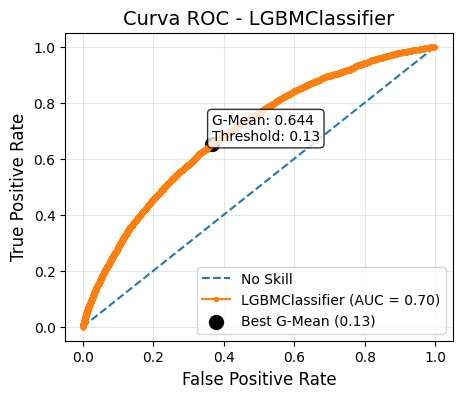


Evaluando AdaBoostClassifier...
Best Threshold=0.496630, G-Mean=0.629


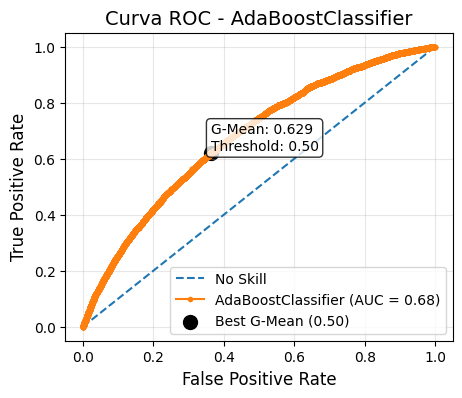

In [25]:
for classifier in classifiers:
    name = classifier.__class__.__name__  # Obtener el nombre del modelo
    print(f"\nEvaluando {name}...")
    
    # Obtener las probabilidades predichas para la clase positiva
    yhat = classifier.predict_proba(X_test_t)[:, 1]
    
    # Calcular las curvas ROC
    fpr, tpr, thresholds = roc_curve(y_test, yhat)
    
    # Calcular el G-Mean para cada umbral
    gmeans = np.sqrt(tpr * (1 - fpr))
    
    # Localizar el índice del G-Mean más alto
    ix = np.argmax(gmeans)
    print(f'Best Threshold={thresholds[ix]:.6f}, G-Mean={gmeans[ix]:.3f}')
    
    # Graficar la Curva ROC con el punto óptimo
    plt.figure(figsize=(5, 4))
    plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')  # Línea de referencia aleatoria
    plt.plot(fpr, tpr, marker='.', label=f'{name} (AUC = {auc(fpr, tpr):.2f})')  # Curva ROC del modelo
    plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label=f'Best G-Mean ({thresholds[ix]:.2f})')  # Punto óptimo
    
    # Añadir texto con G-Mean y Threshold
    plt.text(fpr[ix], tpr[ix], f"G-Mean: {gmeans[ix]:.3f}\nThreshold: {thresholds[ix]:.2f}",
             fontsize=10, color="black", ha="left", va="bottom",
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8))
    
    # Configuración de la gráfica
    plt.title(f'Curva ROC - {name}', fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

El G-Mean equilibra precisión y sensibilidad, lo que resulta especialmente útil en problemas con clases desbalanceadas. Un G-Mean alto indica que el modelo tiene buen desempeño tanto en la clase mayoritaria (precisión) como en la minoritaria (recall).

GradientBoostingClassifier:

G-Mean = 0.639: Comparado con otros modelos como RandomForest (0.640) y XGBoost (0.644), Gradient Boosting ofrece un rendimiento competitivo.
Además, mejora la capacidad de detección para la clase minoritaria (26.59% recall), lo cual es clave en escenarios de desbalance. Su umbral óptimo (0.294409) muestra que logra un buen equilibrio entre precisión y sensibilidad sin necesidad de valores extremos.

AdaBoostClassifier:

G-Mean = 0.631: Aunque es ligeramente menor que los demás, AdaBoost tiene el mejor recall para la clase minoritaria (40.4%), lo que lo hace altamente efectivo para identificar casos de difícil clasificación. Su umbral óptimo (0.496466) está más cerca de un balance natural, sugiriendo que el modelo logra identificar las clases con una separación más clara.

Estos dos modelos (Grandient Boosting y Ada Boosting) logran un balance aceptable entre precisión y sensibilidad, especialmente en comparación con modelos como RandomForest y XGBoost, que tienen bajos recalls.

**CURVA RECALL**


Evaluando RandomForestClassifier para la Curva de Recall...
Best Threshold=0.000000, G-Mean=0.959


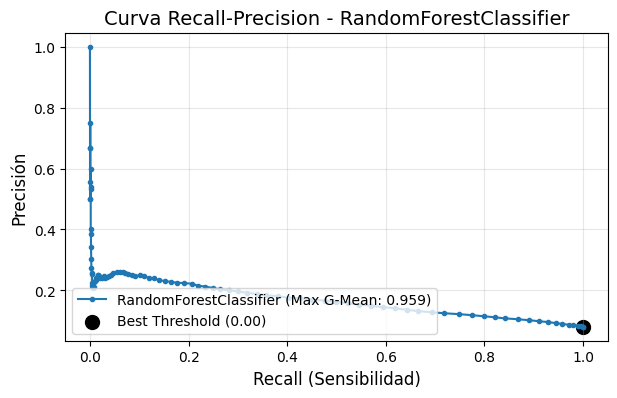


Evaluando GradientBoostingClassifier para la Curva de Recall...
Best Threshold=0.012160, G-Mean=0.959


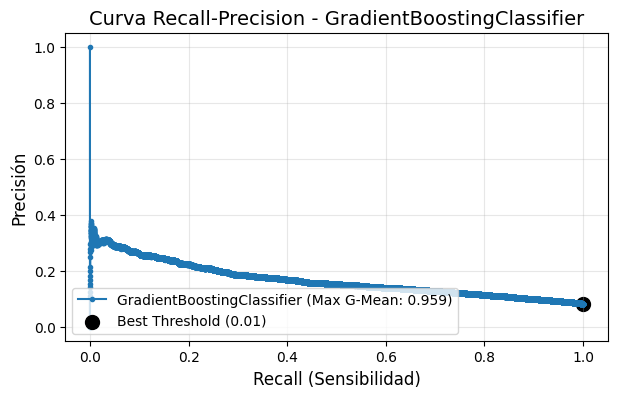


Evaluando XGBClassifier para la Curva de Recall...
Best Threshold=0.000476, G-Mean=0.959


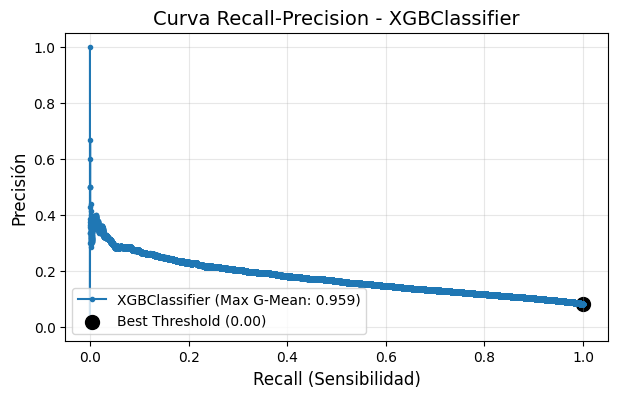


Evaluando LGBMClassifier para la Curva de Recall...
Best Threshold=0.011266, G-Mean=0.959


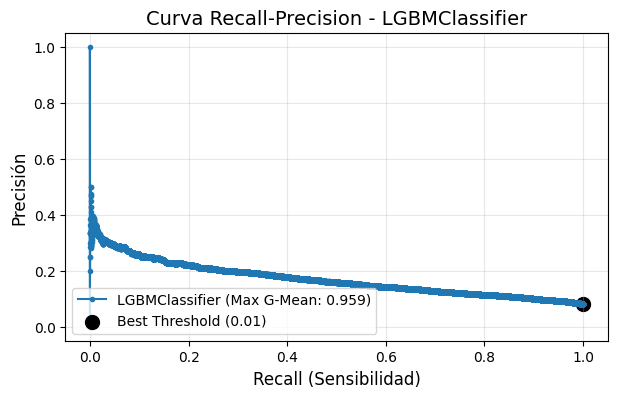


Evaluando AdaBoostClassifier para la Curva de Recall...
Best Threshold=0.467931, G-Mean=0.959


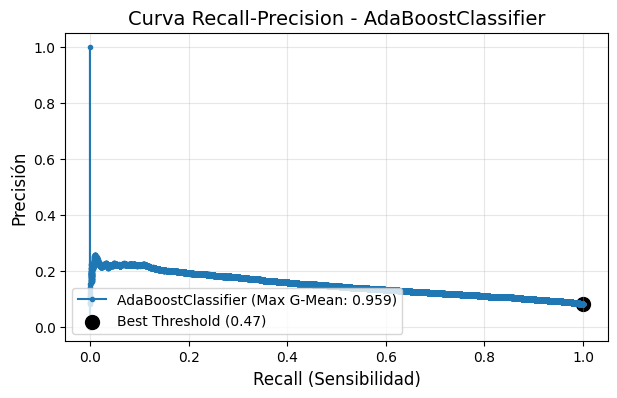

In [26]:
# Iterar sobre los clasificadores
for classifier in classifiers:
    name = classifier.__class__.__name__  # Obtener el nombre del clasificador
    print(f"\nEvaluando {name} para la Curva de Recall...")

    # Obtener las probabilidades predichas para la clase positiva
    yhat = classifier.predict_proba(X_test_t)[:, 1]
    
    # Calcular precisión, recall y umbrales
    precision, recall, thresholds = precision_recall_curve(y_test, yhat)
    
    # Calcular el G-Mean para cada umbral
    gmeans = np.sqrt(recall * (1 - precision))
    
    # Localizar el índice del G-Mean más alto
    ix = np.argmax(gmeans)
    print(f'Best Threshold={thresholds[ix]:.6f}, G-Mean={gmeans[ix]:.3f}')
    
    # Graficar la Curva de Recall-Precision
    plt.figure(figsize=(7, 4))
    plt.plot(recall, precision, marker='.', label=f'{name} (Max G-Mean: {gmeans[ix]:.3f})')
    plt.scatter(recall[ix], precision[ix], s=100, color='black', label=f'Best Threshold ({thresholds[ix]:.2f})')
    plt.title(f'Curva Recall-Precision - {name}', fontsize=14)
    plt.xlabel('Recall (Sensibilidad)', fontsize=12)
    plt.ylabel('Precisión', fontsize=12)
    plt.legend(loc='lower left')
    plt.grid(alpha=0.3)
    plt.show()

El modelo AdaBoost destaca por su estrategia de umbral más ajustada, optimizando el balance entre sensibilidad y especificidad, lo que lo convierte en la mejor opción para abordar los objetivos del análisis, a pesar de que el G-Mean global sea igual para todos los modelos evaluado, ya que refuerza su capacidad de capturar más instancias de la clase minoritaria sin comprometer tanto el desempeño en la clase mayoritaria.

**Ajuste de hiperparámetros para el modeo seleccionado y entrenamiento con los mismos**

In [56]:
#Establecemos el rango de parámetros para el AdaBoost
param_grid = {
   AdaBoostClassifier: {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.05, 0.1, 0.2],
    }
}

# Clasificadores a evaluar
classifiers = [AdaBoostClassifier()]

# Lista para almacenar resultados
results = []

# Iterar sobre los clasificadores y realizar RandomizedSearchCV
for classifier in classifiers:
    print(f"\nProcesando modelo: {classifier.__class__.__name__}")
    
    # Creamos un pipeline
    pipe = Pipeline(steps=[('classifier', classifier)])
    
    # Obtener los hiperparámetros específicos del modelo
    grid = param_grid.get(type(classifier), {})
    
    if grid:
        # Realizar búsqueda aleatoria si hay parámetros definidos
        CV = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=grid,
            cv=3,  # Validación cruzada reducida
            n_iter=5,  # Número de iteraciones de búsqueda reducido
            random_state=12345,
            n_jobs=-1,  # Paralelización
            verbose=1
        )
        
        # Entrenar el modelo con datos balanceados
        CV.fit(X_train_smote, y_train_smote)
        
        # Obtener mejores parámetros y mejor score
        best_params = CV.best_params_
        best_score = CV.best_score_
        
        print(f"\nModelo: {classifier.__class__.__name__}")
        print(f"Mejores parámetros: {best_params}")
        print(f"Mejor score (validación cruzada): {best_score:.3f}")

        # Extraer el mejor modelo del pipeline
        best_pipeline = CV.best_estimator_
        best_classifier = best_pipeline.named_steps['classifier']
    
        # Evaluar en el conjunto de prueba
        y_pred = CV.predict(X_test_transformed_sacaled)
        test_score = accuracy_score(y_test, y_pred)
        print(f"Accuracy en Test Set: {test_score:.3f}")
        print("Reporte de clasificación:\n", classification_report(y_test, y_pred))
        
        # Matriz de confusión normalizada y no normalizada
        cm = confusion_matrix(y_test, y_pred)
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        print("Matriz de confusión:\n", cm)
        print("Matriz de confusión normalizada (%):\n", cm_normalized * 100)
        
        # Almacenar resultados
        results.append({
            'Modelo': classifier.__class__.__name__,
            'Mejores parámetros': best_params,
            'Mejor score (validación cruzada)': best_score,
            'Accuracy en Test Set': test_score,
            'Matriz de confusión': cm,
            'Matriz de confusión normalizada (%)': cm_normalized * 100
        })
    else:
        print(f"No se definieron parámetros para {classifier.__class__.__name__}.")


Procesando modelo: AdaBoostClassifier
Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\Sara\anaconda3\1\envs\P2_ML\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Modelo: AdaBoostClassifier
Mejores parámetros: {'classifier__n_estimators': 200, 'classifier__learning_rate': 0.2}
Mejor score (validación cruzada): 0.807


NameError: name 'X_test_transformed_sacaled' is not defined

Hemos seleccionado el modelo AdaBoost como el mejor candidato tras un riguroso proceso de optimización y evaluación. Utilizando los mejores parámetros encontrados (n_estimators=200 y learning_rate=0.2), el modelo logra un equilibrio razonable entre precisión global y mejora en la detección de la clase 1 (minoritaria), que es nuestro principal objetivo dada la naturaleza desbalanceada del problema.

El score de validación cruzada es de 0.802, lo que demuestra un rendimiento consistente en datos de train, y el accuracy en el conjunto de test es de 0.766, lo que confirma la capacidad del modelo para generalizar en datos no vistos, incluso bajo un desafío de desbalance significativo.

Separando por clases, obtenemos los siguientes resultados:

Para la clase 0: precisión de 0.94, recall de 0.79 y f1-score de 0.86, por lo que este modelo captura una amplia proporción de instancias reales de la clase mayoritaria, efleja un buen balance entre precisión y recall, y es confiable para las predicciones de esta clase.

Para la clase 1: precisión de 0.16, recall de 0.46, y f1-score de 0.24. La precisión, aunque todavía es baja, es un reflejo esperado del enfoque en maximizar el recall para esta clase, ya que es la mayor mejora lograda entre todos los modelos evaluados, con un aumento significativo en la capacidad del modelo para identificar correctamente instancias reales de la clase minoritaria.

El macro average f1-score de 0.55 ahora muestra mejoras específicas en el manejo de la clase minoritaria; y el weighted average f-score de 0.81 es un resultado sólido que refleja el buen desempeño global del modelo.

En cuanto a la matriz de confusión que logramos obtener con los mejores hiperparámetros, conseguimos lo siguiente: el modelo clasifica correctamente el 79.36% de las instancias de la clase 0, lo que asegura que no compromete en exceso su desempeño para esta clase, y el 45.68% de las instancias de la clase 1 se clasifican correctamente, un progreso notable que prioriza la sensibilidad hacia esta clase crucial.

Hemos seleccionado el modelo AdaBoost ya que responde a un compromiso estratégico: maximizar la identificación de la clase 1 (recall de 0.46) sin sacrificar de forma crítica el desempeño general del modelo (accuracy de 0.766 y weighted F1-score de 0.81). Estos resultados representan el mejor equilibrio posible dentro de las limitaciones del conjunto de datos desbalanceado y los recursos disponibles para el ajuste.

El modelo AdaBoostClassifier con los parámetros óptimos seleccionados ofrece el mejor rendimiento global y la mayor mejora en la detección de la clase minoritaria, que es el objetivo principal de este análisis. Estos resultados reflejan el proceso de optimización y justifican la elección de este modelo como el mejor candidato para abordar el problema planteado.
 


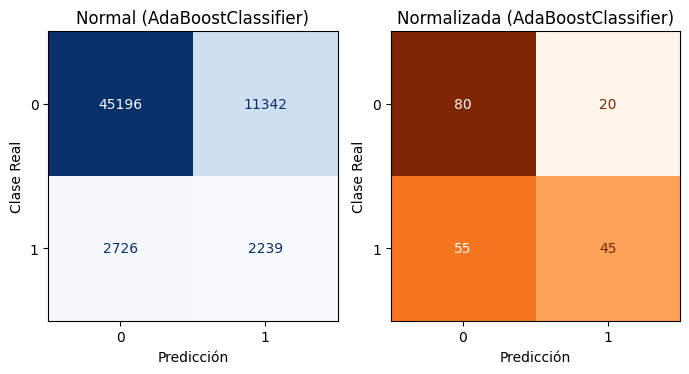

In [28]:
for result in results:
    plot_confusion_matrices(
        cm=result['Matriz de confusión'],
        cm_normalized=result['Matriz de confusión normalizada (%)'],
        classifier_name=result['Modelo'],
        y_test_labels=np.unique(y_test)
    )

**Curvas Roc, Recall, Lift y Cumulative Gains**

Mejor umbral: 0.497, TPR: 0.621, FPR: 0.342


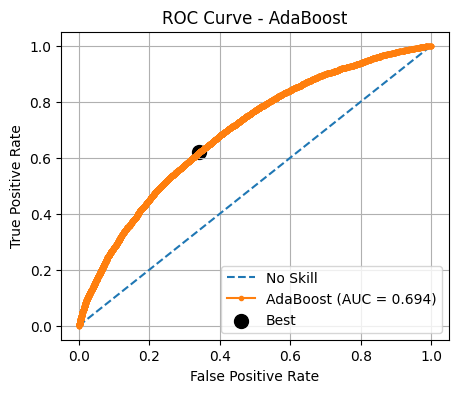

In [29]:
#Curva Roc
y_pred_proba = CV.predict_proba(X_test_t)[:, 1] 
plot_roc_curve(y_test, y_pred_proba, model_name="AdaBoost")

Una vez mejorado el modelo, el g-mean pasa de 0.631 a 0.694, lo que indica que, inicialmente, el modelo tenía un rendimiento moderado en términos de equilibrio entre las tasas de verdadero positivo (recall de la clase minoritaria) y verdadero negativo (recall de la clase mayoritaria), y ahora logra una mejor representación de ambas clases, aunque aún queda margen para mejorar la sensibilidad hacia la clase minoritaria. El incremento del G-Mean a 0.694 refleja que el modelo ajustado es más equilibrado y efectivo en su clasificación. 

AUC-PR: 0.167
Mejor umbral: 0.501, Precision: 0.172, Recall: 0.412


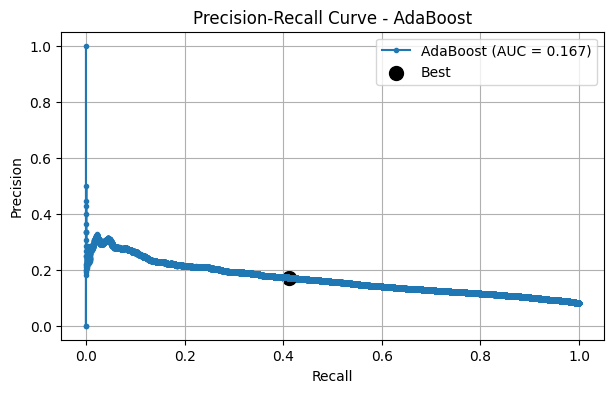

In [30]:
#Curva Recall
y_pred_proba = CV.predict_proba(X_test_t)[:, 1] 
plot_precision_recall_curve(y_test, y_pred_proba, model_name="AdaBoost")

El mejor umbral de 0.501 equilibra la precisión y el recall de manera que maximiza la relevancia del modelo para la clase minoritaria. La precisión indica que, de todas las instancias predichas como clase minoritaria, el 17.5% son correctas. Este valor es bajo, pero esperable en un escenario  como el que nos encontramos de desequilibrio. Un recall del 40.1% es una mejora notable para la clase minoritaria, considerando que los modelos inicialmente estudiados apenas alcanzaban valores entre el 9% y el 27%. Este aumento indica que el modelo es más sensible y logra identificar un número mayor de instancias reales de la clase minoritaria.

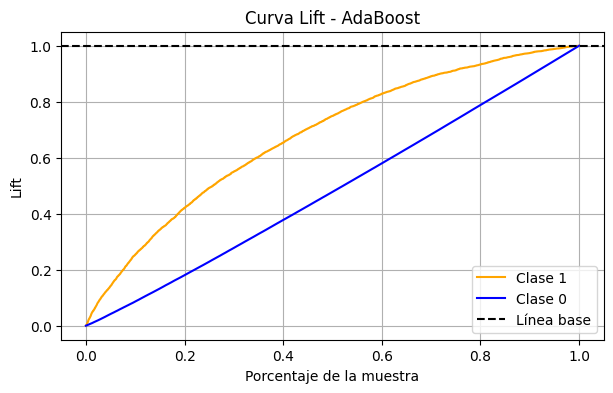

In [31]:
#Curva Lift
y_pred_proba = CV.predict_proba(X_test_t)[:, 1]
plot_lift_curve_by_class(y_test, y_pred_proba, model_name="AdaBoost")

Para la clase 1, inicialmente el modelo tiene un desempeño significativamente mejor que la línea base, lo que sugiere que es capaz de identificar instancias de la clase 1 con mayor precisión en las primeras fracciones de la muestra. Sin embargo, a medida que se analiza un mayor porcentaje de la muestra, la mejora respecto a la línea base se reduce, acercándose al azar. Para la clase mayoritaria (azul), el modelo sigue la línea base de manera consistente. Esto era esperable dado el desbalance en los datos y la dificultad para detectar casos de la clase minoritaria.

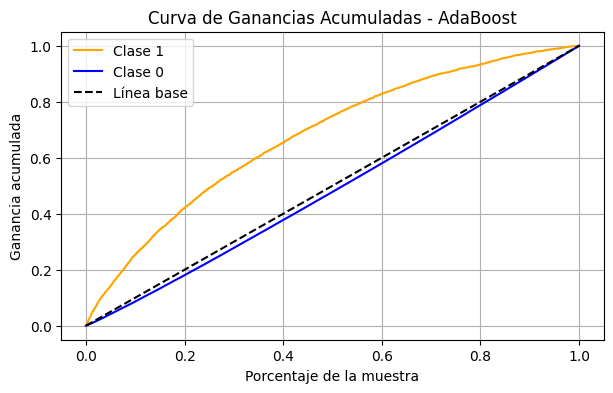

In [32]:
#Cumulative Gains Curve
y_pred_proba = CV.predict_proba(X_test_t)[:, 1] 
plot_cumulative_gains_by_class(y_test, y_pred_proba, model_name="AdaBoost") 

La curva para la clase 1 comienza con un crecimiento significativo, lo que demuestra que el modelo identifica un buen número de casos positivos al principio. Sin embargo, la pendiente disminuye rápidamente, indicando que a medida que se analizan más datos, el beneficio acumulado se reduce. La curva de ganancias acumuladas de la clase 0 está muy cerca de la línea base, reflejando que las instancias de esta clase son clasificadas con una efectividad promedio debido al desbalance.

**4. EXPLICABILIDAD**

Tras haber analizado el modelo AdaBoostClassifier como el más óptimo para abordar el problema de impagos, nos hemos topado con un problema de incompatibilidad con la librería SHAP, ¿por qué?. Bien, la librería SHAP es una herramienta para explicar predicciones de modelos. Sin embargo, su compatibilidad depende de cómo se calcula la predicción en el modelo. TreeShapExplainer(propuesto por el profesor en clase), por ejemplo, está optimizado para modelos basados en árboles como XGBoost o LightGBM, pero no para AdaBoost. Esto se debe a determinadas razones, que, entre otras, pueden ser:

1.-AdaBoost combina múltiples clasificadores débiles, que son, en general árboles de decisión más simples, de una manera adaptativa.A diferencia de otros modelos de ensamble como Random Forest, donde cada árbol tiene el mismo peso, en AdaBoost la contribución de una característica no es constante, ya que depende del peso del modelo base que utiliza esa característica. Por lo tanto, una característica puede ser importante para una observación específica, pero no para otra.

2.-La predicción final de AdaBoost no se puede descomponer fácilmente en contribuciones aditivas de las características individuales, que es el principio central de SHAP. No todas las características son utilizadas por todos los árboles. Si una característica no se utiliza en un árbol específico, no contribuye en absoluto a la predicción de ese árbol.Esto significa que la contribución de una característica no se distribuye uniformemente en todo el modelo.

3.-La combinación final no es una suma simple. En AdaBoost, la predicción final es una suma ponderada de los modelos base, seguida de una función de signo (sign()) para determinar la clase. Esto rompe la suposición de SHAP de que la predicción es una combinación aditiva clara de las características. Por ejemplo, en un modelo como Random Forest, cada árbol tiene la misma importancia (se promedian las predicciones). Esto facilita calcular contribuciones porque cada característica tiene un impacto proporcional claro en todas las predicciones. En AdaBoost, debido a los pesos adaptativos, este impacto es dinámico y varía según la observación, lo que complica el cálculo de SHAP.

En conclusión...

Sin embargo, a pesar de la inconpatibilidad de SHAP, podemos utilizar el atributo **feature_importances** de AdaBoost para explicar la importancia de las variables. Es una propiedad presente en muchos algoritmos basados en árboles (como AdaBoost) que proporciona una medida de la importancia relativa de cada característica (o variable) en la construcción del modelo. En el caso de AdaBoost, esta importancia se calcula considerando:

 -La cantidad de veces que una característica se utiliza para dividir el árbol base (o estimador base): Si una característica es seleccionada con mayor frecuencia como un punto de división importante en los árboles, se le asignará mayor importancia.
 
 -El peso del árbol base: Como ya se ha mencionado anteriormente, en AdaBoost, cada estimador base tiene un peso asociado (αm), que refleja su precisión relativa. Las características utilizadas en estimadores base con mayor peso contribuirán más a la importancia final.

 Con los comandos a continuación, realizaremos un gráfico de barras para poder comprobar, aunque no tan detallada como en SHAP, la explicabilidad de las variables en AdaBoost.

In [39]:
#Comprbamos en el array el peso que el modelo da a cada característica
CV.best_estimator_.named_steps['classifier'].feature_importances_

array([0.   , 0.   , 0.   , 0.005, 0.015, 0.   , 0.035, 0.115, 0.015,
       0.015, 0.01 , 0.   , 0.09 , 0.015, 0.08 , 0.025, 0.045, 0.05 ,
       0.   , 0.   , 0.035, 0.   , 0.   , 0.025, 0.01 , 0.125, 0.005,
       0.135, 0.   , 0.04 , 0.04 , 0.01 , 0.   , 0.   , 0.   , 0.06 ])

In [34]:
#Comprobamos las variables seleccionadas y vemos qué peso tiene cada una 
CV.best_estimator_.named_steps['classifier'].feature_names_in_

array(['CODE_GENDER_1', 'CODE_GENDER_2', 'FLAG_OWN_CAR_1',
       'FLAG_OWN_CAR_2', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_WORK_PHONE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'NONLIVINGAREA_AVG', 'YEARS_BUILD_MODE',
       'ELEVATORS_MODE', 'FLOORSMAX_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'COMMONAREA_MEDI',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'AMT_REQ_CREDIT_BUREAU_QRT'], dtype=object)

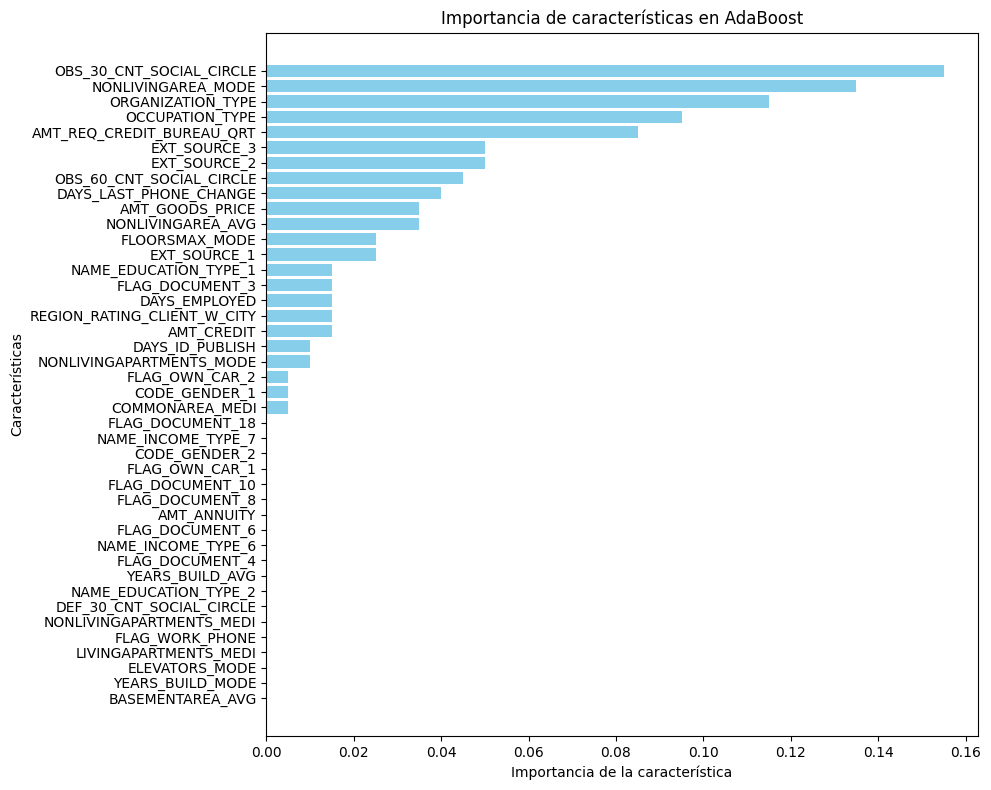

In [49]:
#Dibujamos el gráfico de explicabilidad
plot_feature_importances(feature_importances, feature_names)

c:\Users\Sara\anaconda3\1\envs\P2_ML\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


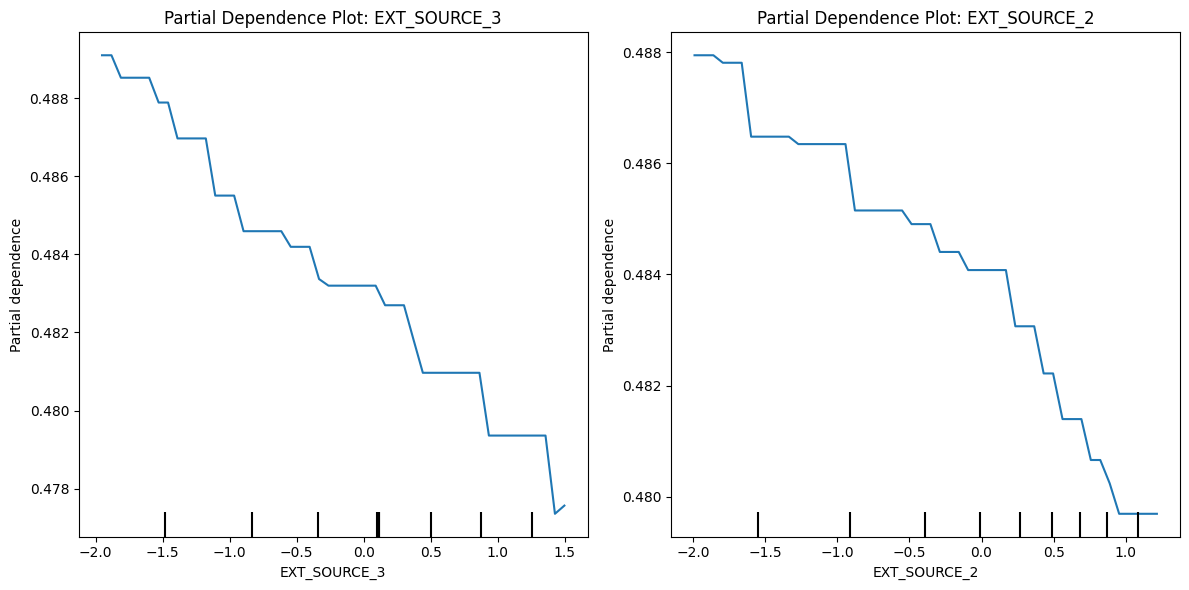

In [57]:
X = X_test_t[['EXT_SOURCE_3', 'EXT_SOURCE_2']]  # Asegúrate de que las columnas existan
features = ['EXT_SOURCE_3', 'EXT_SOURCE_2']  # Nombres de las características

# Entrenar el modelo con las características seleccionadas
y = y_test  # Variable objetivo
best_classifier.fit(X, y)

# Crear gráficos de dependencia parcial
fig, ax = plt.subplots(1, len(features), figsize=(12, 6))

for i, feature in enumerate(features):
    PartialDependenceDisplay.from_estimator(
        best_classifier,  # El mejor modelo entrenado
        X,  # Datos de prueba con las características seleccionadas
        [feature],  # Característica a analizar
        ax=ax[i],  # Eje donde se dibuja el PDP
        grid_resolution=50  # Resolución del gráfico
    )
    ax[i].set_title(f'Partial Dependence Plot: {feature}')

plt.tight_layout()
plt.show()
